# Phase 1 implement linear regression

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")



# Sample data
data = {
    'spend': [100, 200, 150, 300, 250],
    'clicks': [10, 20, 15, 25, 30],
    'purchases1d': [5, 10, 5, 15, 8],
    'sales': [120, 250, 180, 330, 270],
    'unitsSoldClicks1d': [1, 1, 1, 2, 1],
    'unitsSoldSameSku1d': [1, 2, 1, 3, 2],
    'costPerClick': [10, 10, 10, 12, 11],
    'clickThroughRate': [0.1, 0.15, 0.12, 0.18, 0.2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate ROI
df['ROI'] = (df['sales'] - df['spend']) / df['spend']

# Define features and target
X = df[['spend', 'clicks', 'purchases1d', 'sales', 'unitsSoldClicks1d',
        'unitsSoldSameSku1d', 'costPerClick', 'clickThroughRate']]
y_roi = df['ROI']

# Split the data
X_train, X_test, y_train_roi, y_test_roi = train_test_split(X, y_roi, test_size=0.2, random_state=42)

# Fit a linear regression model
model_roi = LinearRegression()
model_roi.fit(X_train, y_train_roi)

# Predict and calculate performance metrics
y_pred_roi = model_roi.predict(X_test)

# Convert ROI to percentage
y_test_roi_percentage = y_test_roi * 100
y_pred_roi_percentage = y_pred_roi * 100

# Calculate evaluation metrics
mse_roi = mean_squared_error(y_test_roi_percentage, y_pred_roi_percentage)
rmse_roi = mse_roi ** 0.5
mae_roi = mean_absolute_error(y_test_roi_percentage, y_pred_roi_percentage)

# Print results in percentage
print(f"ROI Prediction - MSE: {mse_roi:.2f}, RMSE: {rmse_roi:.2f}, MAE: {mae_roi:.2f}")

# Calculate Mean Predicted ROI in percentage
mean_predicted_roi = y_pred_roi_percentage.mean()
print(f"Average Predicted ROI: {mean_predicted_roi:.2f}%")

ROI Prediction - MSE: 2.89, RMSE: 1.70, MAE: 1.70
Average Predicted ROI: 23.30%


In [12]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_roi.coef_
})

# Sort by absolute value of coefficients to see the most impactful features
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Calculate the total sum of absolute coefficients
total_abs_coef = feature_importance['AbsCoefficient'].sum()

# Calculate the percentage contribution of each feature
feature_importance['PercentageContribution'] = (feature_importance['AbsCoefficient'] / total_abs_coef) * 100

# Display the feature importance in percentage
print("\nFeature Impact on ROI (sorted by impact in percentage):")
print(feature_importance[['Feature', 'PercentageContribution']])


Feature Impact on ROI (sorted by impact in percentage):
              Feature  PercentageContribution
0               spend               36.935023
3               sales               32.580005
1              clicks               21.609281
2         purchases1d                4.121062
5  unitsSoldSameSku1d                2.053524
6        costPerClick                2.053524
4   unitsSoldClicks1d                0.509877
7    clickThroughRate                0.137705


In [13]:
correlation_matrix = df[['spend', 'sales', 'clicks', 'purchases1d', 'unitsSoldClicks1d',
                         'costPerClick', 'clickThroughRate', 'ROI']].corr()
print(correlation_matrix['ROI'].sort_values(ascending=False))


ROI                  1.000000
purchases1d         -0.411936
unitsSoldClicks1d   -0.507752
sales               -0.582226
spend               -0.696311
clicks              -0.739830
clickThroughRate    -0.751002
costPerClick        -0.838561
Name: ROI, dtype: float64


In [14]:
from sklearn.linear_model import LinearRegression

# Define the features and target
X = df[['spend', 'clicks', 'purchases1d', 'unitsSoldClicks1d', 'costPerClick', 'clickThroughRate']]
y = df['ROI']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Output the coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance['Importance'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

             Feature  Coefficient  Importance
4       costPerClick    -0.105179    0.105179
3  unitsSoldClicks1d    -0.034456    0.034456
2        purchases1d     0.010001    0.010001
1             clicks    -0.008961    0.008961
0              spend     0.000896    0.000896
5   clickThroughRate    -0.000524    0.000524


# Featuring with Ridge as it performed better than lasso while handling variance

# Check for Multicollinearity using Ridge and Lasso

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Fit Ridge regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
ridge_model.fit(X, y)

# Predict and calculate R-squared
y_pred_ridge = ridge_model.predict(X)
ridge_r2 = r2_score(y, y_pred_ridge)

print("Ridge Regression R-squared:", ridge_r2)


Ridge Regression R-squared: 0.8682468766941596


In [17]:
from sklearn.linear_model import Lasso

# Fit Lasso regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X, y)

# Predict and calculate R-squared
y_pred_lasso = lasso_model.predict(X)
lasso_r2 = r2_score(y, y_pred_lasso)

print("Lasso Regression R-squared:", lasso_r2)

Lasso Regression R-squared: 0.484375


# hyperparameter tuning with Ridge

In [18]:
from sklearn.linear_model import RidgeCV

# Cross-validate over a range of alphas
ridge_cv_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], scoring='r2', cv=5)
ridge_cv_model.fit(X, y)

print("Best alpha for Ridge:", ridge_cv_model.alpha_)
print("Best R-squared with RidgeCV:", ridge_cv_model.score(X, y))


Best alpha for Ridge: 0.01
Best R-squared with RidgeCV: 0.9999005609966217


# Phase 2 including attributions and segmentation for brands and categories

Focus on areas with high elasticity, where small changes in the input (like spend or clicks) result in significant ROI improvements.

In [6]:
elasticity_spend = (df['ROI'].pct_change() / df['spend'].pct_change()).mean() * 100
print(f"Elasticity of ROI with respect to Spend: {elasticity_spend:.2f}%")

Elasticity of ROI with respect to Spend: 43.75%


# Segmentation analysis targeting ROI

In [11]:
# Sample data with Sony appearing 2 times and Nike 3 times
data = {
    'category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries', 'Health', 'Health',
                 'Electronics', 'Clothing', 'Clothing', 'Clothing'],
    'brand': ['Sony', 'Samsung', 'Nike', 'Adidas', 'Whole Foods', 'Trader Joe\'s', 'Nature Valley', 'GNC',
              'Sony', 'Nike', 'Nike', 'Nike'],
    'ROI': [0.15, 0.10, 0.25, 0.18, 0.30, 0.22, 0.20, 0.12, 0.17, 0.26, 0.24, 0.28],
    'spend': [500, 700, 200, 300, 100, 120, 150, 180, 400, 220, 230, 240],
    'sales': [600, 800, 250, 350, 130, 150, 180, 200, 550, 270, 280, 290]
}

# Create DataFrame
df_segmented = pd.DataFrame(data)

# Group by category and brand, then aggregate (summed spend and sales, mean ROI)
segmented_df = df_segmented.groupby(['category', 'brand']).agg({'ROI': 'mean', 'spend': 'sum', 'sales': 'sum'}).reset_index()

# Convert ROI to percentage and format to 2 decimal places
segmented_df['ROI'] = (segmented_df['ROI'] * 100).round(2)

# Print the result
segmented_df

,category,brand,ROI,spend,sales
0,Clothing,Adidas,18.00,300,350
1,Clothing,Nike,25.75,890,1090
2,Electronics,Samsung,10.00,700,800
3,Electronics,Sony,16.00,900,1150
4,Groceries,Trader Joe's,22.00,120,150
5,Groceries,Whole Foods,30.00,100,130
6,Health,GNC,12.00,180,200
7,Health,Nature Valley,20.00,150,180


In [10]:
import pandas as pd

# Sample data
data = {
    'category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries', 'Health', 'Health',
                 'Electronics', 'Clothing', 'Clothing', 'Clothing'],
    'brand': ['Sony', 'Samsung', 'Nike', 'Adidas', 'Whole Foods', 'Trader Joe\'s', 'Nature Valley', 'GNC',
              'Sony', 'Nike', 'Nike', 'Nike'],
    'ROI': [0.15, 0.10, 0.25, 0.18, 0.30, 0.22, 0.20, 0.12, 0.17, 0.26, 0.24, 0.28],
    'spend': [500, 700, 200, 300, 100, 120, 150, 180, 400, 220, 230, 240],
    'sales': [600, 800, 250, 350, 130, 150, 180, 200, 550, 270, 280, 290]
}

# Create DataFrame
df_segmented = pd.DataFrame(data)

# Group by category and brand, then aggregate (summed spend and sales, mean ROI)
segmented_df = df_segmented.groupby(['category', 'brand']).agg({'ROI': 'mean', 'spend': 'sum', 'sales': 'sum'}).reset_index()

# Convert ROI to percentage and format to 2 decimal places
segmented_df['ROI'] = (segmented_df['ROI'] * 100).round(2)

# Calculate the overall average for each feature (ROI, spend, and sales)
avg_ROI = segmented_df['ROI'].mean()
avg_spend = segmented_df['spend'].mean()
avg_sales = segmented_df['sales'].mean()

# Compare each row's ROI, spend, and sales with the overall average
segmented_df['low_ROI'] = segmented_df['ROI'] < avg_ROI
segmented_df['low_spend'] = segmented_df['spend'] < avg_spend
segmented_df['low_sales'] = segmented_df['sales'] < avg_sales

# Print the results with flags indicating where the values are lower
segmented_df

,category,brand,ROI,spend,sales,low_ROI,low_spend,low_sales
0,Clothing,Adidas,18.00,300,350,True,True,True
1,Clothing,Nike,25.75,890,1090,False,False,False
2,Electronics,Samsung,10.00,700,800,True,False,False
3,Electronics,Sony,16.00,900,1150,True,False,False
4,Groceries,Trader Joe's,22.00,120,150,False,True,True
5,Groceries,Whole Foods,30.00,100,130,False,True,True
6,Health,GNC,12.00,180,200,True,True,True
7,Health,Nature Valley,20.00,150,180,False,True,True


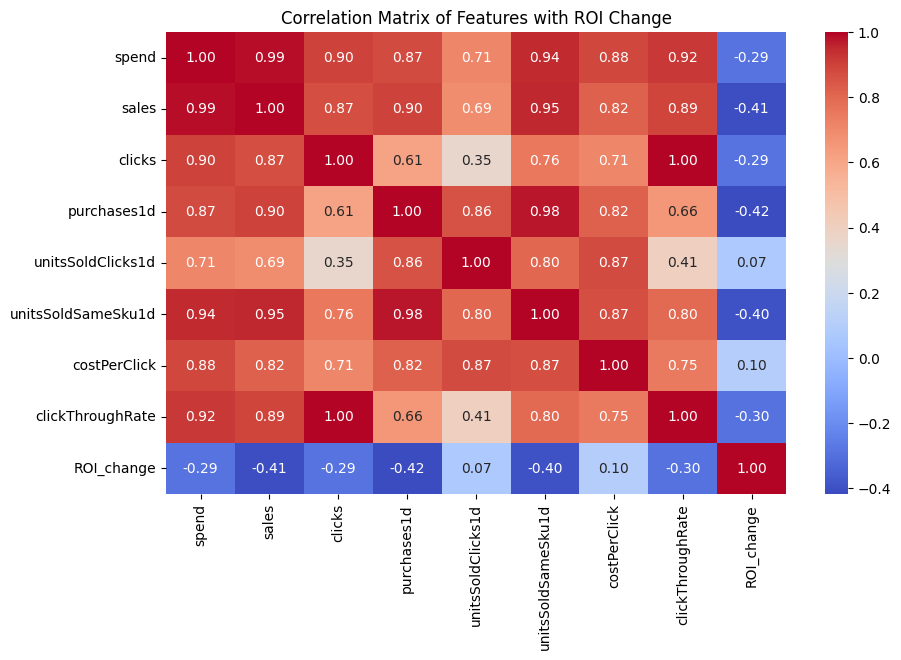


Feature Importance (Linear Regression Coefficients):
              Feature  Coefficient
0               spend     0.001595
4   unitsSoldClicks1d     0.000261
7    clickThroughRate    -0.000037
6        costPerClick    -0.000080
1               sales    -0.000983
5  unitsSoldSameSku1d    -0.001392
2              clicks    -0.004150
3         purchases1d    -0.005756

Feature Importance (Decision Tree):
              Feature  Importance
3         purchases1d    0.938272
7    clickThroughRate    0.061728
0               spend    0.000000
1               sales    0.000000
2              clicks    0.000000
4   unitsSoldClicks1d    0.000000
5  unitsSoldSameSku1d    0.000000
6        costPerClick    0.000000


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Sample data with additional features
data = {
    'category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries'],
    'brand': ['Sony', 'Samsung', 'Nike', 'Adidas', 'Whole Foods'],
    'ROI_current': [0.15, 0.10, 0.25, 0.18, 0.30],  # Current ROI
    'ROI_previous': [0.12, 0.11, 0.22, 0.16, 0.28],  # Previous ROI
    'spend': [100, 200, 150, 300, 250],
    'clicks': [10, 20, 15, 25, 30],
    'purchases1d': [5, 10, 5, 15, 8],
    'sales': [120, 250, 180, 330, 270],
    'unitsSoldClicks1d': [1, 1, 1, 2, 1],
    'unitsSoldSameSku1d': [1, 2, 1, 3, 2],
    'costPerClick': [10, 10, 10, 12, 11],
    'clickThroughRate': [0.1, 0.15, 0.12, 0.18, 0.2]
}

# Create DataFrame
df_segmented = pd.DataFrame(data)

# Calculate the ROI change (Current - Previous)
df_segmented['ROI_change'] = df_segmented['ROI_current'] - df_segmented['ROI_previous']

# Calculate correlation of features with ROI_change
correlations = df_segmented[['spend', 'sales', 'clicks', 'purchases1d', 'unitsSoldClicks1d',
                             'unitsSoldSameSku1d', 'costPerClick', 'clickThroughRate', 'ROI_change']].corr()

# Visualizing the correlation matrix for better understanding
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features with ROI Change')
plt.show()

# Train a Linear Regression model to predict ROI_change
X = df_segmented[['spend', 'sales', 'clicks', 'purchases1d', 'unitsSoldClicks1d',
                  'unitsSoldSameSku1d', 'costPerClick', 'clickThroughRate']]
y = df_segmented['ROI_change']

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coefficients from the model to understand feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(feature_importance)

# Decision Tree Regressor to get more insight into feature importance
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Feature importance from decision tree
tree_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
})
tree_feature_importance = tree_feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(tree_feature_importance)

# Insights:

To increase ROI, you might want to focus on increasing purchases and improving conversion rates from clicks to purchases.

Optimizing the cost per click and click-through rate should be done with caution, as higher costs per click could reduce ROI.